Importing the json and pandas

In [0]:
import json
import pandas as pd


Data file uploaded in google collab

In [229]:
from google.colab import files
uploaded = files.upload()



Saving data.json to data (2).json


Reading json file into data frame called as df

In [0]:
# with open('data.json', 'r') as f:
#     for line in f:
#         T.append(json.loads(line))
# print(T[0])
df = pd.read_json('data.json',lines=True)

Displaying the data frame

In [231]:
df

,bra size,category,cup size,fit,height,hips,item_id,length,quality,shoe size,shoe width,size,user_id,age,body type,bust size,rented for,weight,fit_to_numeric
0,34,new,d,small,167.6,38.000000,123373,just right,5.0,0.0,Unspecified,7,991571,33,Unspecified,Unspecified,Unspecified,137.391709,1
1,36,new,b,small,157.5,30.000000,123373,just right,3.0,0.0,Unspecified,13,587883,33,Unspecified,Unspecified,Unspecified,137.391709,1
2,32,new,b,small,170.2,40.358501,123373,slightly long,2.0,9.0,Unspecified,7,395665,33,Unspecified,Unspecified,Unspecified,137.391709,1
3,36,new,dd/e,fit,165.1,40.358501,123373,just right,5.0,0.0,Unspecified,21,875643,33,Unspecified,Unspecified,Unspecified,137.391709,2
4,36,new,b,small,157.5,40.358501,123373,slightly long,5.0,0.0,Unspecified,18,944840,33,Unspecified,Unspecified,Unspecified,137.391709,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275329,36,jumpsuit,Unspecified,fit,175.3,40.358501,2252812,Unspecified,5.0,0.0,Unspecified,8,66386,42,hourglass,34dd,work,140.000000,2
275330,36,dress,Unspecified,fit,154.9,40.358501,682043,Unspecified,5.0,0.0,Unspecified,4,118398,29,petite,32c,work,100.000000,2
275331,36,dress,Unspecified,fit,172.7,40.358501,683251,Unspecified,3.0,0.0,Unspecified,8,47002,31,straight & narrow,36a,everyday,135.000000,2
275332,36,dress,Unspecified,fit,167.6,40.358501,126335,Unspecified,5.0,0.0,Unspecified,16,961120,31,pear,36c,wedding,165.000000,2


Converting the categorical data into numerical data tried various methods but found label encoder to be working successfully.
Label encoder used to convert categorical data which are 'category' and 'body type' columns into numerical value

In [232]:
# OneHotEncoder = pd.get_dummies(df['category'])
# # on_thot=pd.get_dummies(df['category'])
# onehotencoder = OneHotEncoder(categorical_features = [0]) 
# df = df.drop('category',axis=1) 
# df = df.join(onthot) 

from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
df['category']= Label_Encoder.fit_transform(df['category']) 
df

from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
df['body type']= Label_Encoder.fit_transform(df['body type']) 
df

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(categorical_features=[1])
# df['category'] =  enc.fit_transform(df['category'])
# enc.fit_transform(df).toarray()
# df
# # from sklearn.feature_extraction import DictVectorizer
# # v = DictVectorizer(sparse=False)


# # x = x.apply(lambda y : v.fit_transform(y))
# # x.head(10)
# # # X = v.fit_transform(t)
# # # X

# from sklearn import preprocessing 


# DicVect = preprocessing.DictVectorizer() 
# df['category']= DicVect.fit_transform(df['category']) 
# df
#  on_thot=pd.get_dummies(data['category'])
# # #onehotencoder = OneHotEncoder(categorical_features = [0]) 
# # df = data.drop('category',axis=1) 
# # df = df.join(onthot) 


,bra size,category,cup size,fit,height,hips,item_id,length,quality,shoe size,shoe width,size,user_id,age,body type,bust size,rented for,weight,fit_to_numeric
0,34,30,d,small,167.6,38.000000,123373,just right,5.0,0.0,Unspecified,7,991571,33,0,Unspecified,Unspecified,137.391709,1
1,36,30,b,small,157.5,30.000000,123373,just right,3.0,0.0,Unspecified,13,587883,33,0,Unspecified,Unspecified,137.391709,1
2,32,30,b,small,170.2,40.358501,123373,slightly long,2.0,9.0,Unspecified,7,395665,33,0,Unspecified,Unspecified,137.391709,1
3,36,30,dd/e,fit,165.1,40.358501,123373,just right,5.0,0.0,Unspecified,21,875643,33,0,Unspecified,Unspecified,137.391709,2
4,36,30,b,small,157.5,40.358501,123373,slightly long,5.0,0.0,Unspecified,18,944840,33,0,Unspecified,Unspecified,137.391709,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275329,36,22,Unspecified,fit,175.3,40.358501,2252812,Unspecified,5.0,0.0,Unspecified,8,66386,42,4,34dd,work,140.000000,2
275330,36,13,Unspecified,fit,154.9,40.358501,682043,Unspecified,5.0,0.0,Unspecified,4,118398,29,6,32c,work,100.000000,2
275331,36,13,Unspecified,fit,172.7,40.358501,683251,Unspecified,3.0,0.0,Unspecified,8,47002,31,7,36a,everyday,135.000000,2
275332,36,13,Unspecified,fit,167.6,40.358501,126335,Unspecified,5.0,0.0,Unspecified,16,961120,31,5,36c,wedding,165.000000,2


Displaying data frames with specific columns which are used for prediction. The columns included are 'user_id','item_id','size', 'category','body type','fit_to_numeric'.

In [233]:
df[['user_id','item_id','size', 'category','body type','fit_to_numeric']]          

,user_id,item_id,size,category,body type,fit_to_numeric
0,991571,123373,7,30,0,1
1,587883,123373,13,30,0,1
2,395665,123373,7,30,0,1
3,875643,123373,21,30,0,2
4,944840,123373,18,30,0,1
...,...,...,...,...,...,...
275329,66386,2252812,8,22,4,2
275330,118398,682043,4,13,6,2
275331,47002,683251,8,13,7,2
275332,961120,126335,16,13,5,2


Dividing the data  into features and labels. Features include the 'user_id','item_id','category','size','body type' which are required input values for our data set.

In [234]:
features = df[['user_id','item_id','category','size','body type']]
print(features)

        user_id  item_id  category  size  body type
0        991571   123373        30     7          0
1        587883   123373        30    13          0
2        395665   123373        30     7          0
3        875643   123373        30    21          0
4        944840   123373        30    18          0
...         ...      ...       ...   ...        ...
275329    66386  2252812        22     8          4
275330   118398   682043        13     4          6
275331    47002   683251        13     8          7
275332   961120   126335        13    16          5
275333   123612   127865        16    16          2

[275334 rows x 5 columns]


Labels are defined which are the required output for our data set.  Output is obtained in the form of  fit, small or large for the cloth.
small = 1, fit = 2, large =3

In [235]:
label = df['fit_to_numeric']
print(label)

0         1
1         1
2         1
3         2
4         1
         ..
275329    2
275330    2
275331    2
275332    2
275333    2
Name: fit_to_numeric, Length: 275334, dtype: int64


Dividing the data set into training and testing sets. Training is given as 80% of the data and testing is given as 20% of data. Therefore training and testing sets are formed.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

Applied the Gausian Naive Bayes Algorithm. Our data set contains normal(continous) form of data set. Gausian Naive Bayes Algorithm works better on our data set as compared to Multinomial and Bernauli Algorithms.
Further the parameter here is set as Default one with priors=None , var_smoothing=1e-09. Priors set to none takes prior probability in accordance of our data set. And 1e-09 gives variance.

In [237]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None , var_smoothing=1e-09)
model.fit(X_train, y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

Predicting the values using the x_test 

In [0]:

import numpy as np
y_pred = model.predict(X_test)



Predicting the accuracy score for the data set using Gaussian Naive Bayes Algorithm

In [239]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(score)
 

0.720758348920406


Displaying the classification report 

In [240]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7738
           2       0.72      1.00      0.84     39690
           3       0.00      0.00      0.00      7639

    accuracy                           0.72     55067
   macro avg       0.24      0.33      0.28     55067
weighted avg       0.52      0.72      0.60     55067



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Displaying the confusion matrix

Confusion matrix, without normalization
[[    0  7738     0]
 [    0 39690     0]
 [    0  7639     0]]


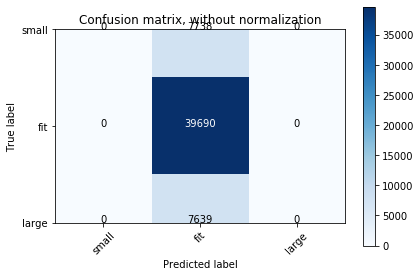

In [241]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
# confusion_matrix=confusion_matrix(y_test,y_pred)
# print(confusion_matrix)
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['small','fit','large'],
                      title='Confusion matrix, without normalization')


Changed the parameter values of the Gaussian Naive bayes Algorithm by setting prior probability = [0.2,0.2,0.6] 

In [242]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=[0.2,0.2,0.6] , var_smoothing=1e-09)
model.fit(X_train, y_train)


GaussianNB(priors=[0.2, 0.2, 0.6], var_smoothing=1e-09)

Calculated the accuracy by giving the above prob 

In [0]:
import numpy as np
y_pred = model.predict(X_test)


In [244]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(score)
 

0.13872192056948807


changed the parameter values of the Gaussian Naive bayes Algorithm by setting prior probability = [0.2,0.6,0.2] 

In [245]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=[0.2,0.6,0.2] , var_smoothing=1e-09)
model.fit(X_train, y_train)


GaussianNB(priors=[0.2, 0.6, 0.2], var_smoothing=1e-09)

In [0]:
import numpy as np
y_pred = model.predict(X_test)


Calculated the accuracy by giving the above prob 

In [247]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(score)

0.720758348920406


changed the parameter values of the Gaussian Naive bayes Algorithm by setting prior probability = [0.6,0.2,0.2] 

In [248]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=[0.6,0.2,0.2] , var_smoothing=1e-09)
model.fit(X_train, y_train)

GaussianNB(priors=[0.6, 0.2, 0.2], var_smoothing=1e-09)

In [0]:
import numpy as np
y_pred = model.predict(X_test)


Calculated the accuracy by giving the above prob 

In [250]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(score)

0.14051973051010588


Tried implementing the Multinomial Naive Bayes too. But since our data set contains continous values rather than discrete values so Gaussian is better to use. Multinomial works better on discrete set of data.

In [251]:
from sklearn.naive_bayes import MultinomialNB

model  = MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model.fit(X_train, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=False)

In [0]:
import numpy as np
y_pred = model.predict(X_test)

Calculated the accuracy using Multinomial model.

In [253]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(score)

0.4517950859861623
